Подключение библиотек

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from google.colab import files

Делим данные на обучающую и тестовую выборки

In [ ]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")

In [ ]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Cabin'] = train['Cabin'].fillna('Unknown')
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [ ]:
num_col = train.select_dtypes(include = np.number).columns.to_list()
num_col

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Убираем ID пассажиров

In [ ]:
del num_col[0:1]
num_col

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
select_col = num_col
str_col = ["Sex", "Embarked", "Survived"]
select_col.extend(str_col)
select_col

['Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex',
 'Embarked',
 'Survived']

In [ ]:
train_eda = train[train.columns.intersection(select_col)]
train_eda.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
train_eda = train_eda.dropna(axis = 0)
X = train_eda [["Age", "SibSp", "Parch", "Fare"]]
X = pd.concat([X, pd.get_dummies(data = train_eda[["Sex", "Embarked", "Pclass"]],\
                                 columns = ["Sex", "Embarked", "Pclass"])], axis = 1)
X.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,False,True,False,False,True,False,False,True
1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
2,26.0,0,0,7.9250,True,False,False,False,True,False,False,True
3,35.0,1,0,53.1000,True,False,False,False,True,True,False,False
4,35.0,0,0,8.0500,False,True,False,False,True,False,False,True


In [ ]:
y = train_eda ["Survived"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train set\t :",X_train.shape, y_train.shape,\
     "\nTest set\t :", X_test.shape, y_train.shape)

Train set	 : (712, 12) (712,) 
Test set	 : (179, 12) (712,)


In [ ]:
Dtree = DecisionTreeClassifier(max_depth = 3)
Dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
feat_labels=X.columns

** Визуализация дерева решений **

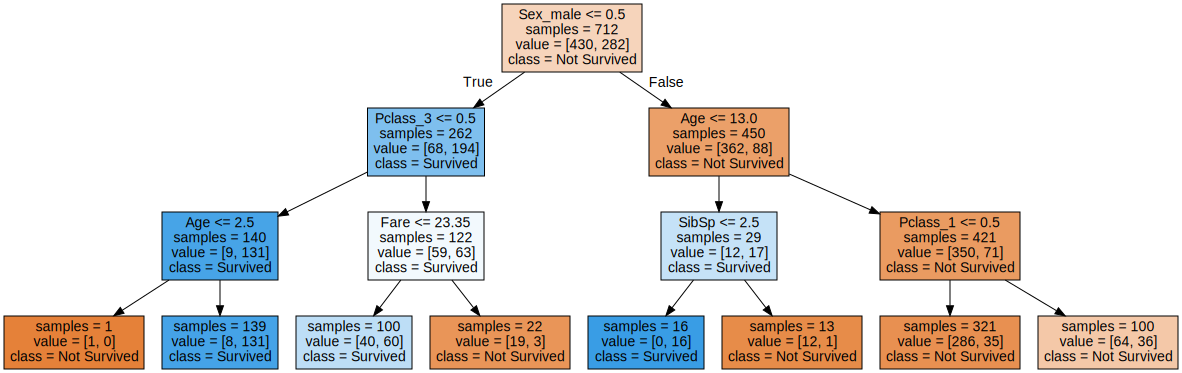

In [ ]:
export_graphviz(Dtree,
               out_file='tree_plot.dot',
               class_names=['Not Survived', 'Survived'],
               feature_names=feat_labels,
               impurity=False,filled=True)
with open('tree_plot.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

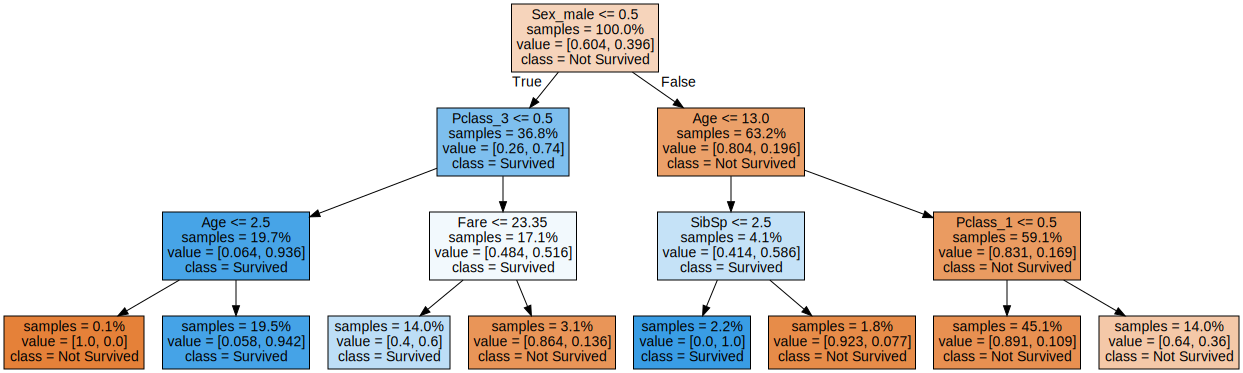

In [ ]:
export_graphviz(Dtree,
               out_file='tree_plot2.dot',
               class_names=['Not Survived', 'Survived'],
               feature_names=feat_labels,
                proportion=True,
               impurity=False,
                filled=True)
with open('tree_plot2.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

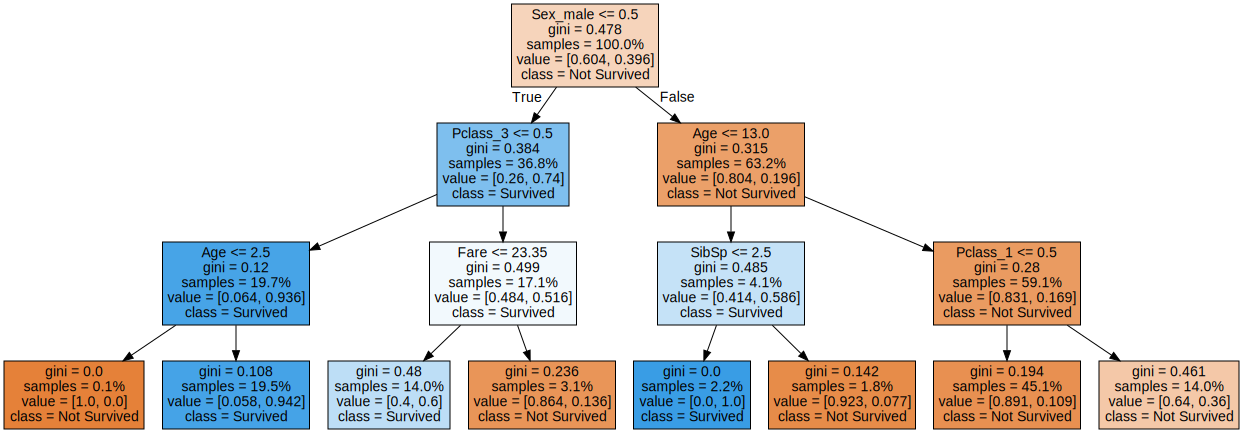

In [ ]:
export_graphviz(Dtree,
               out_file='tree_plot3.dot',
               class_names=['Not Survived', 'Survived'],
               feature_names=feat_labels,
                proportion=True,
               impurity=True,
                filled=True)
with open('tree_plot3.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

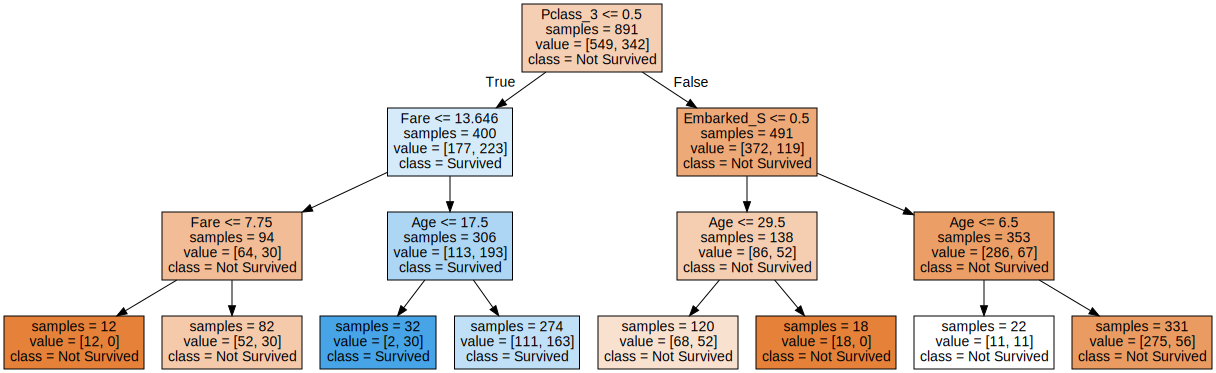

In [ ]:
X.drop('Sex_male',axis=1,inplace=True)
X.drop('Sex_female',axis=1,inplace=True)
Dtree.fit(X, y)
feat_labels=X.columns
export_graphviz(Dtree,
               out_file='tree_plot4.dot',
               class_names=['Not Survived', 'Survived'],
               feature_names=feat_labels,
               impurity=False,
                filled=True)
with open('tree_plot4.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [ ]:
data_med_class =train.copy()
titanic = data_med_class.drop(columns=['Name', 'Ticket', 'PassengerId'])

**Выживаемость в призме различных показателей**

<ipython-input-62-8048b1261672>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = titanic.groupby('AgeGroup')['Survived'].mean().round(2)


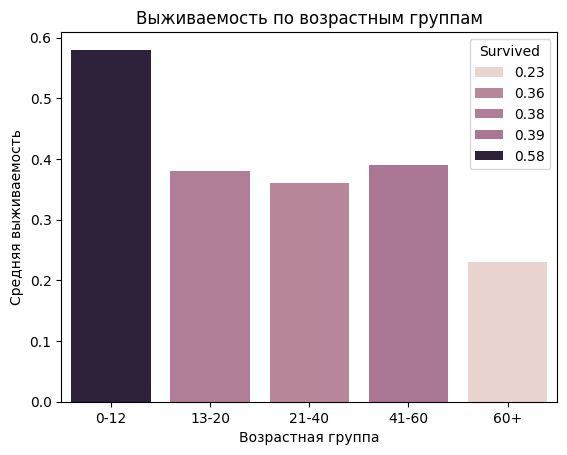

In [ ]:
age_b = [0, 12, 20, 40, 60, 100]
age_l = ['0-12', '13-20', '21-40', '41-60', '60+']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=age_b, labels=age_l)

age_group = titanic.groupby('AgeGroup')['Survived'].mean().round(2)

import seaborn as sns
sns.barplot(x=age_group.index, y=age_group.values, hue=age_group)
import matplotlib.pyplot as plt
plt.title('Выживаемость по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средняя выживаемость')
plt.show()

Влияние пола на выживаемость

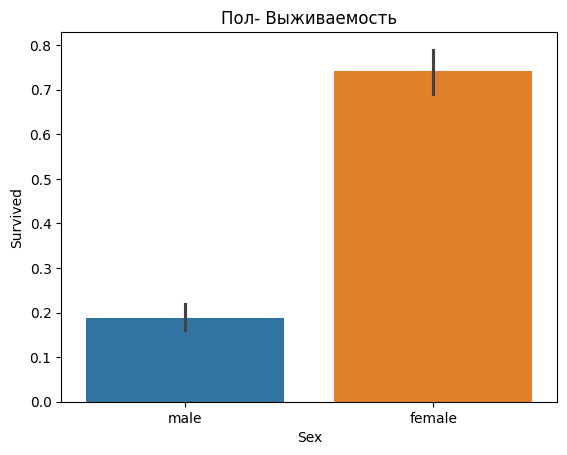

In [ ]:
sns.barplot(x='Sex', y='Survived', data=titanic, hue='Sex')
plt.title('Пол- Выживаемость')
plt.show()

Влияние класса билета на выживаемость по полу

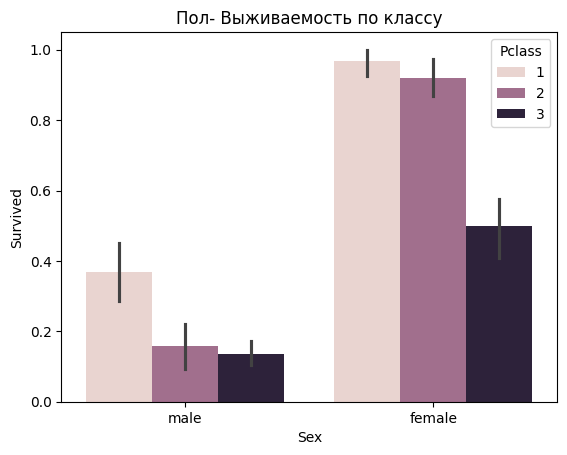

In [ ]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=titanic)
plt.title('Пол- Выживаемость по классу')
plt.show()


Влияние числа родственников на выживаемость

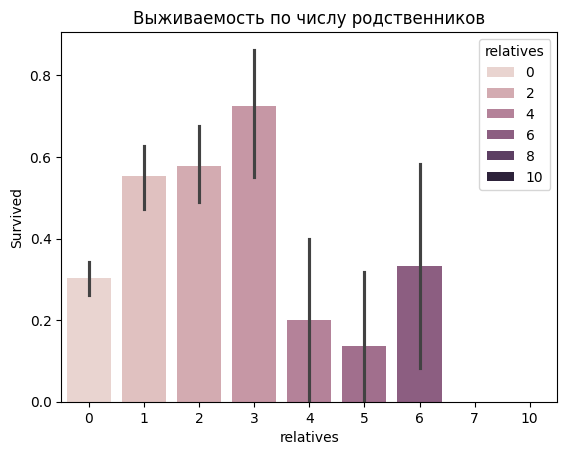

In [ ]:
titanic['relatives'] = titanic['SibSp'] + titanic['Parch']
sns.barplot(x='relatives', y='Survived', hue='relatives', data=titanic)
plt.title('Выживаемость по числу родственников')
plt.show()

Итого, при помощи статистического анализа мы сделали предположения по поводу выживаемости пассажиров.

Наибольшая вероятность выжить на титанике у девочки до 12 лет из 1 или 2 класса, у которой есть хотя бы один близкий человек.